# Project One: Multiple Regression, Qualitative Variables Interactions, Quadratic Regression

For Project One, you have been asked to create different regression models analyzing a housing data set. Before beginning work on the project, be sure to read through the Project One Guidelines and Rubric to understand what you need to do and how you will be graded on this assignment. Be sure to carefully review the Project One Summary Report template, which contains all of the questions that you will need to answer about the regression analyses you are performing.

For this project, you will be writing all the scripts yourself. You may reference the textbook and your previous work on the problem sets to help you write the scripts.


### Scenario

You are a data analyst working for a real estate company. You have access to a large set of historical data that you can use to analyze relationships between different attributes of a house (such as square footage or the number of bathrooms) and the house’s selling price. You have been asked to create different regression models to predict sale prices for houses based on critical variable factors. These regression models will help your company set better prices when listing a home for a client. Setting better prices will ensure that listings can be sold within a reasonable amount of time.

There are several variables in this data set, but you will be working with the following important variables: 

| <div style="text-align: left"> Variable </div>  |   <div style="text-align: left"> What does it represent? </div> |
| -- | --  |
| <div style="text-align: left"> price </div> | <div style="text-align: left"> Sale price of the home </div> |
| <div style="text-align: left"> bedrooms </div> | <div style="text-align: left"> Number of bedrooms </div> |
| <div style="text-align: left"> bathrooms </div> | <div style="text-align: left"> Number of bathrooms </div> |
| <div style="text-align: left"> sqft_living </div> | <div style="text-align: left"> Size of the living area in sqft </div> |
| <div style="text-align: left"> sqft_above </div> | <div style="text-align: left"> Size of the upper level in sqft </div> |
| <div style="text-align: left"> sqft_lot </div> | <div style="text-align: left"> Size of the lot in sqft </div> |
| <div style="text-align: left"> age </div> | <div style="text-align: left"> Age of the home </div> |
| <div style="text-align: left"> grade </div> | <div style="text-align: left"> Measure of craftsmanship and the quality of materials used to build the home </div> |
| <div style="text-align: left"> appliance_age </div> | <div style="text-align: left"> Average age of all appliances in the home </div> |
| <div style="text-align: left"> crime </div> | <div style="text-align: left"> Crime rate per 100,000 people </div> |
| <div style="text-align: left"> backyard </div> | <div style="text-align: left"> Home has a backyard (backyard=1) or not (backyard=0) </div> |
| <div style="text-align: left"> view </div> | <div style="text-align: left"> Home backs out to a lake (view=2), backs out to trees (view=1), or backs out to a road (view=0) </div> |

**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# Prepare Your Data Set

In the following code block, you have been given the R code to prepare your data set.

Click the **Run** button on the toolbar to run this code.

In [1]:
housing <- read.csv(file="housing.csv", header=TRUE, sep=",")

# converting appropriate variables to factors  
housing <- within(housing, {
   view <- factor(view)
   backyard <- factor(backyard)
})

# number of columns
ncol(housing)

# number of rows
nrow(housing)

[1] 22

[1] 2692

In [2]:
print(str(housing))

'data.frame':	2692 obs. of  22 variables:
 $ id           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ price        : int  325000 745000 571000 395000 449950 243000 219950 799000 207000 750000 ...
 $ bedrooms     : int  3 5 4 2 3 3 3 5 4 4 ...
 $ bathrooms    : num  2.25 3 1 2 1.75 1.75 1.5 2.75 2 2.75 ...
 $ sqft_living  : int  1570 2400 1350 1960 1470 1450 1070 2500 1690 2640 ...
 $ sqft_lot     : int  43350 10126 4000 4018 7590 12125 6601 19783 7728 3750 ...
 $ floors       : num  1 2 1.5 1 1 1 1 1 1.5 2 ...
 $ backyard     : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 2 1 1 ...
 $ view         : Factor w/ 3 levels "0","1","2": 3 3 1 1 1 1 1 3 1 1 ...
 $ condition    : int  4 3 3 5 3 4 3 4 4 5 ...
 $ grade        : int  7 8 8 7 7 7 6 8 7 7 ...
 $ sqft_above   : int  1570 2400 1350 980 1470 1450 1070 2500 1690 1840 ...
 $ sqft_basement: int  0 0 0 980 0 0 0 0 0 800 ...
 $ yr_built     : int  1967 1981 1930 1950 1988 1981 1985 1959 1967 1911 ...
 $ yr_renovated : int  0 0 0 0 0 0 0 0 0 0 ...
 $ r

# Model #1 - First Order Regression Model with Quantitative and Qualitative Variables

You have been asked to create a first order regression model for *price* as the response variable, and *sqft_living*, *grade*, *bathrooms*, and *view* as predictor variables. Before writing any code, review Section 3 of the Summary Report template to see the questions you will be answering about your first order multiple regression model.

Run your scripts to get the outputs of your regression analysis. Then use the outputs to answer the questions in your summary report.

**Note: Use the + (plus) button to add new code blocks, if needed.**

In [3]:
var <- c('price','sqft_living','age')
data <- housing[var]
cor(data)

,price,sqft_living,age
price,1.00000000,0.6894838,-0.07460764
sqft_living,0.68948378,1.0000000,-0.35473332
age,-0.07460764,-0.3547333,1.00000000


In [4]:
model_1_variables = c('price', 'sqft_living','grade','bathrooms','view')
data_1 <- housing[model_1_variables]
print(str(data_1))
summary(data_1)

'data.frame':	2692 obs. of  5 variables:
 $ price      : int  325000 745000 571000 395000 449950 243000 219950 799000 207000 750000 ...
 $ sqft_living: int  1570 2400 1350 1960 1470 1450 1070 2500 1690 2640 ...
 $ grade      : int  7 8 8 7 7 7 6 8 7 7 ...
 $ bathrooms  : num  2.25 3 1 2 1.75 1.75 1.5 2.75 2 2.75 ...
 $ view       : Factor w/ 3 levels "0","1","2": 3 3 1 1 1 1 1 3 1 1 ...
NULL


     price          sqft_living       grade          bathrooms     view    
 Min.   :  78000   Min.   : 500   Min.   : 5.000   Min.   :0.750   0:2347  
 1st Qu.: 313075   1st Qu.:1400   1st Qu.: 7.000   1st Qu.:1.500   1: 185  
 Median : 432000   Median :1840   Median : 7.000   Median :2.000   2: 160  
 Mean   : 473155   Mean   :1955   Mean   : 7.541   Mean   :2.048           
 3rd Qu.: 590000   3rd Qu.:2390   3rd Qu.: 8.000   3rd Qu.:2.500           
 Max.   :1525000   Max.   :5850   Max.   :12.000   Max.   :5.250           

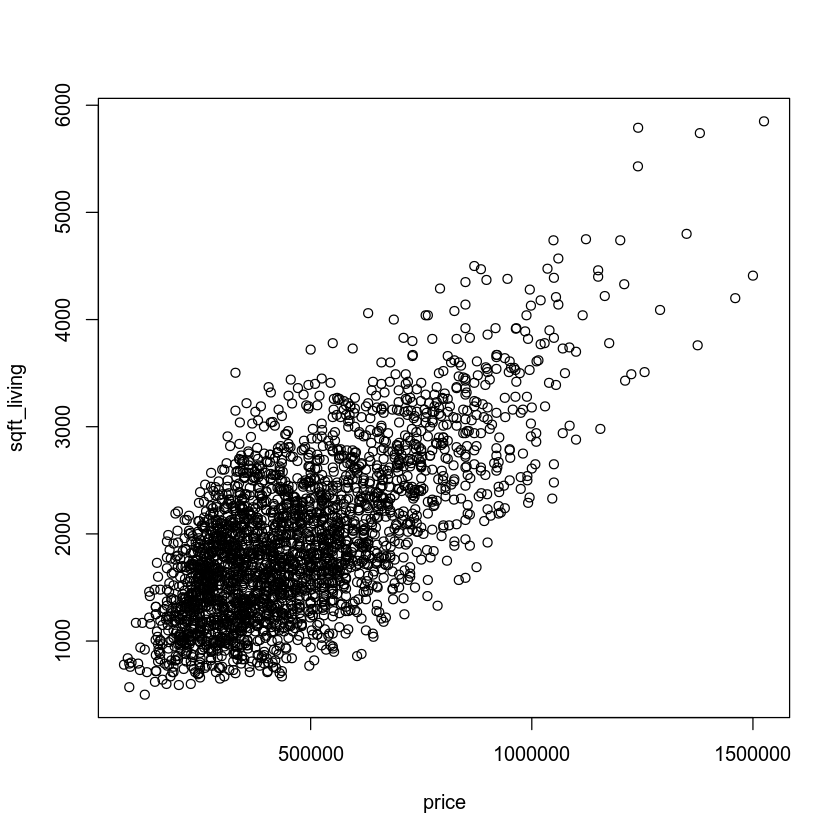

In [5]:
with(data_1, plot(price, sqft_living))

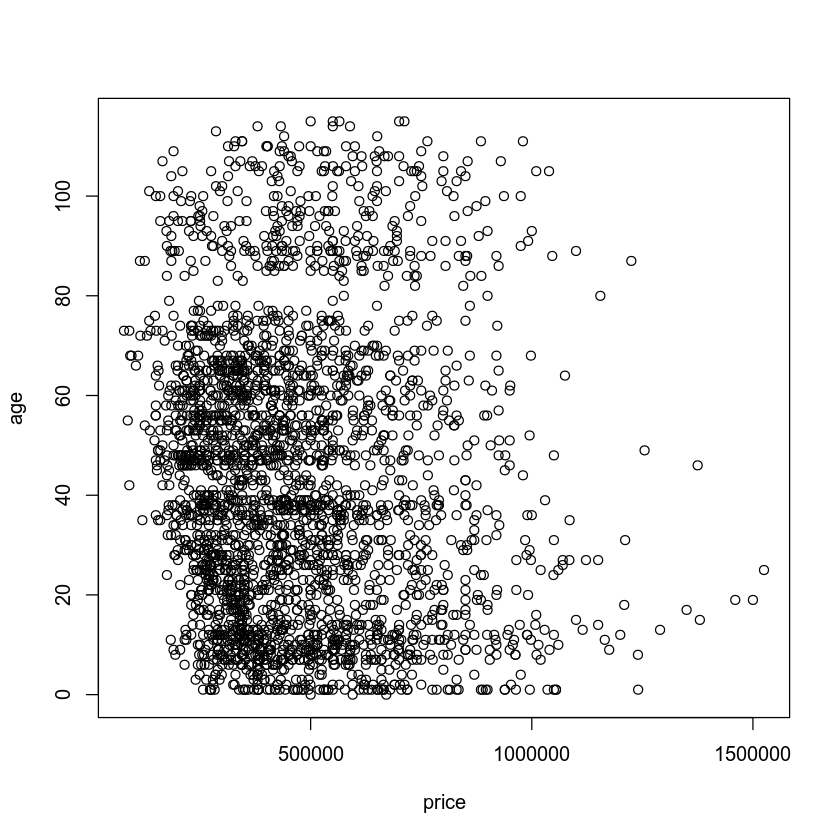

In [6]:
with(housing, plot(price, age))

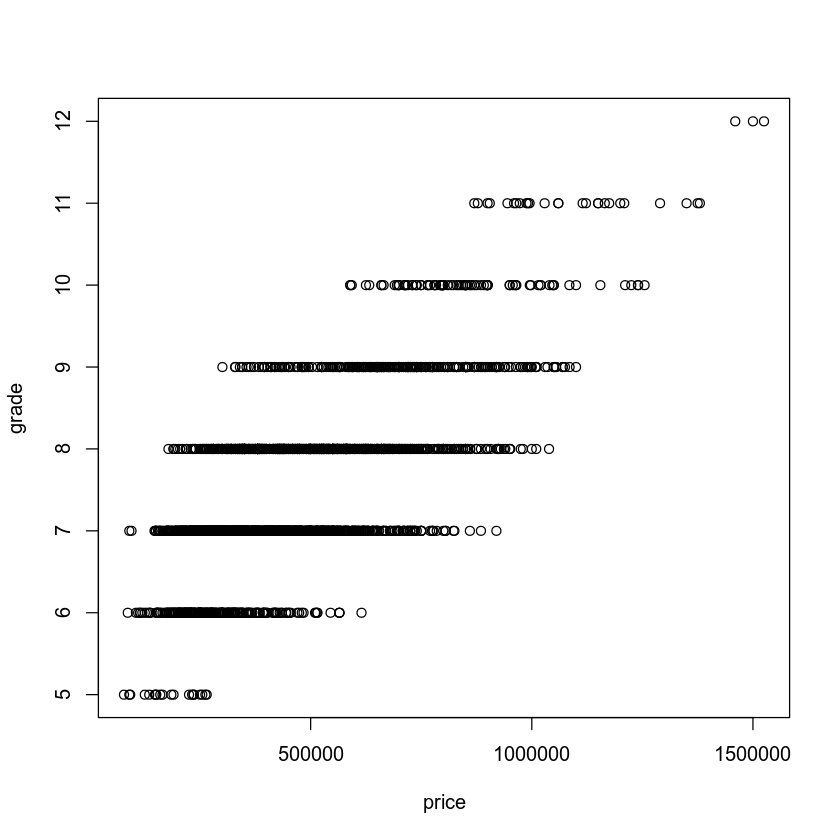

In [7]:
with(data_1, plot(price, grade))

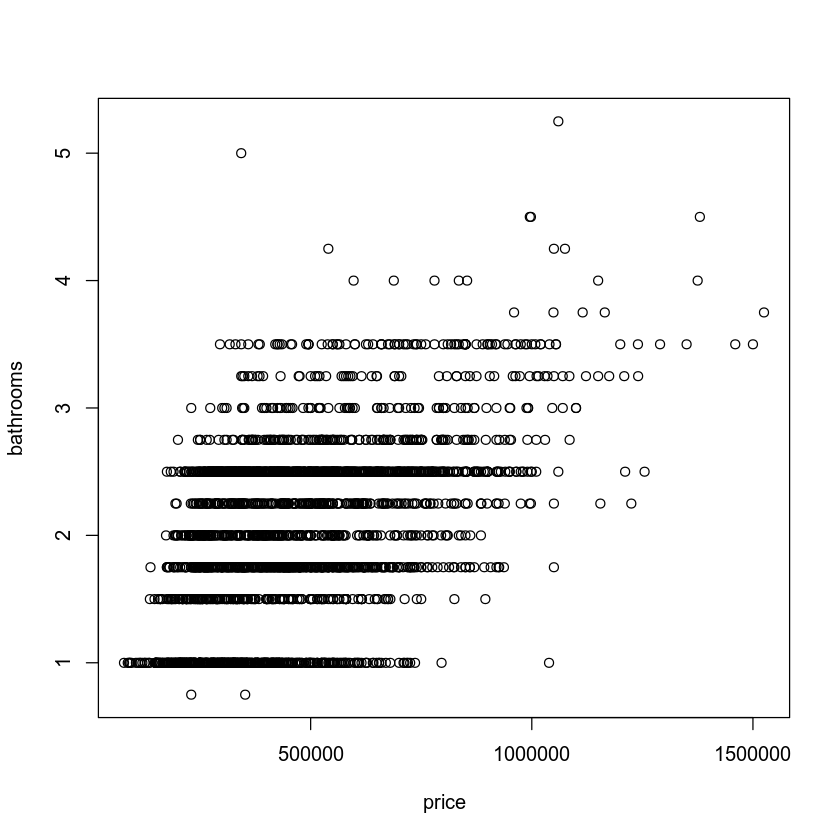

In [8]:
with(data_1, plot(price, bathrooms))

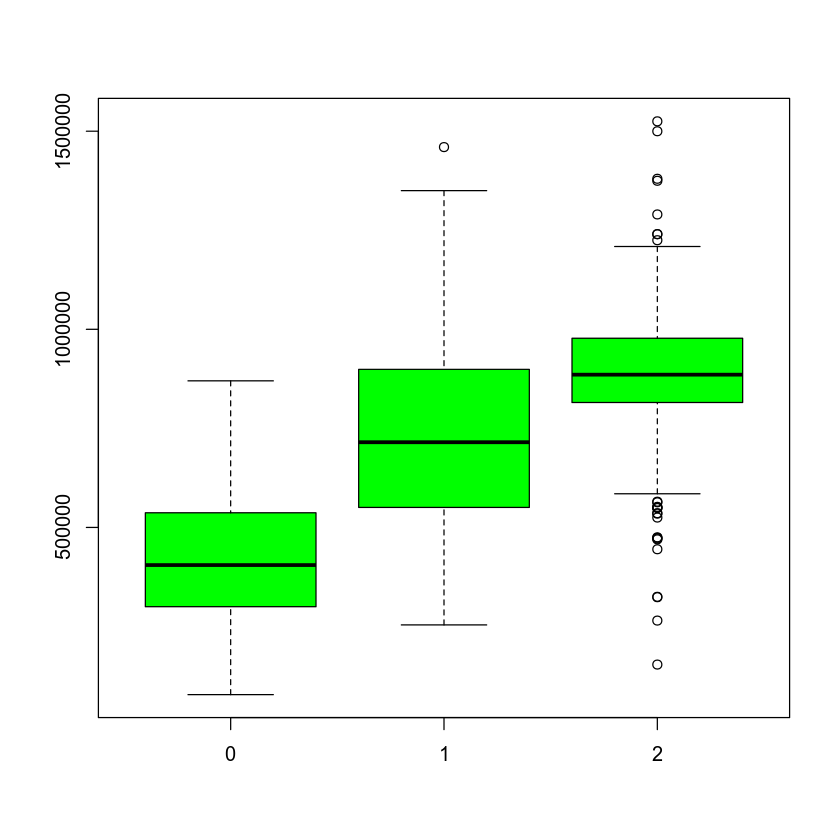

In [9]:
boxplot(price~view, data=data_1, col = "green")

In [10]:
fitted_first <- lm(price ~ sqft_living+grade+bathrooms+view + sqft_living:grade + sqft_living:bathrooms + grade:bathrooms, data=data_1)
summary(fitted_first)


Call:
lm(formula = price ~ sqft_living + grade + bathrooms + view + 
    sqft_living:grade + sqft_living:bathrooms + grade:bathrooms, 
    data = data_1)

Residuals:
    Min      1Q  Median      3Q     Max 
-389356  -89642   -9839   82443  385329 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -2.545e+05  6.729e+04  -3.782 0.000159 ***
sqft_living            1.198e+02  3.406e+01   3.517 0.000444 ***
grade                  7.744e+04  1.178e+04   6.575 5.84e-11 ***
bathrooms             -8.072e+04  4.130e+04  -1.954 0.050767 .  
view1                  1.640e+05  1.006e+04  16.307  < 2e-16 ***
view2                  2.262e+05  1.165e+04  19.416  < 2e-16 ***
sqft_living:grade     -4.983e+00  4.330e+00  -1.151 0.249967    
sqft_living:bathrooms  5.655e+00  6.633e+00   0.852 0.394019    
grade:bathrooms        6.392e+03  6.002e+03   1.065 0.287003    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard 

In [11]:
resid_values <-fitted_first$resid
fitted_values <- fitted_first$fitted
(df<-data.frame(fitted_values,resid_values))

fitted_values,resid_values
<dbl>,<dbl>
586148.8,-261148.781
735037.0,9962.984
450975.9,120024.054
404217.3,-9217.275
363986.6,85963.360
362090.5,-119090.541
251848.1,-31898.140
748588.6,50411.399
378238.2,-171238.247


In [12]:
coeff=coefficients(fitted_first)
# equation of the line : 
cat(eq = paste0("y= ", round(coeff[1],1)," + ", round(coeff[2],1), 
                "(x_1)", " + ", round(coeff[3],1), "(x_2)", "+ ", round(coeff[4],1), "(x_3)", "+ ", 
                round(coeff[5],1), "(x_4)", "+ ", round(coeff[6],1), "(x_5)","+ ", 
                round(coeff[7],1), "(x_1x_2)", "+ ", round(coeff[8],1), "(x_1x_3)","+ ",
                round(coeff[9],1), "(x_2x_3)"))
cat("\nwhere y: price, x_1: sqft_living, x_2: grade, x_3: bathrooms, x_4: view1, x_5: view2")

y= -254512.9 + 119.8(x_1) + 77442.6(x_2)+ -80719.3(x_3)+ 163983.8(x_4)+ 226231.9(x_5)+ -5(x_1x_2)+ 5.7(x_1x_3)+ 6391.6(x_2x_3)
where y: price, x_1: sqft_living, x_2: grade, x_3: bathrooms, x_4: view1, x_5: view2

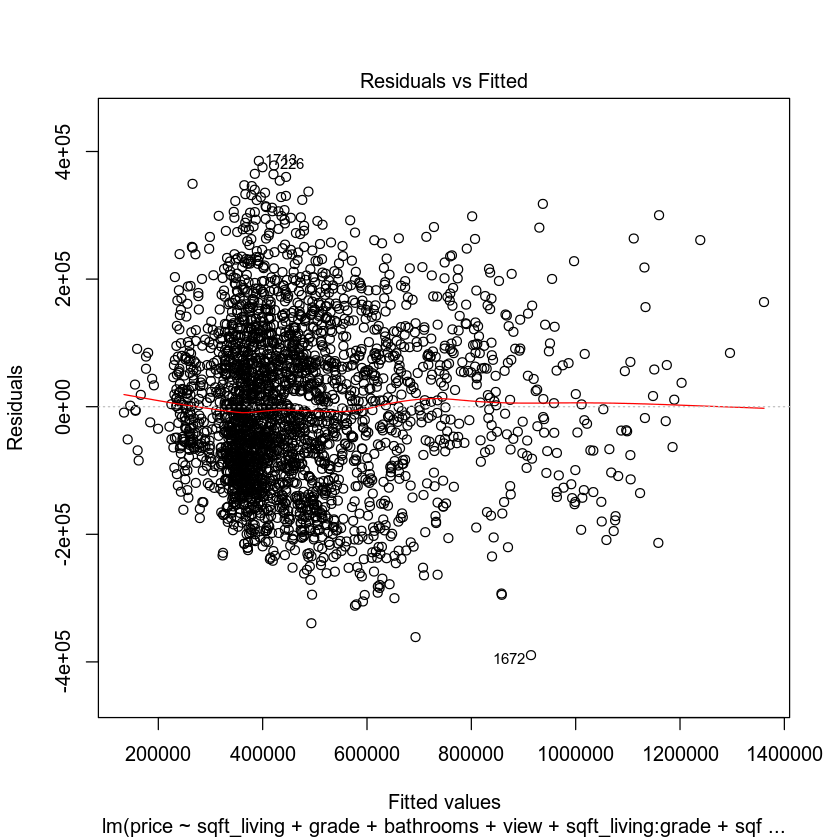

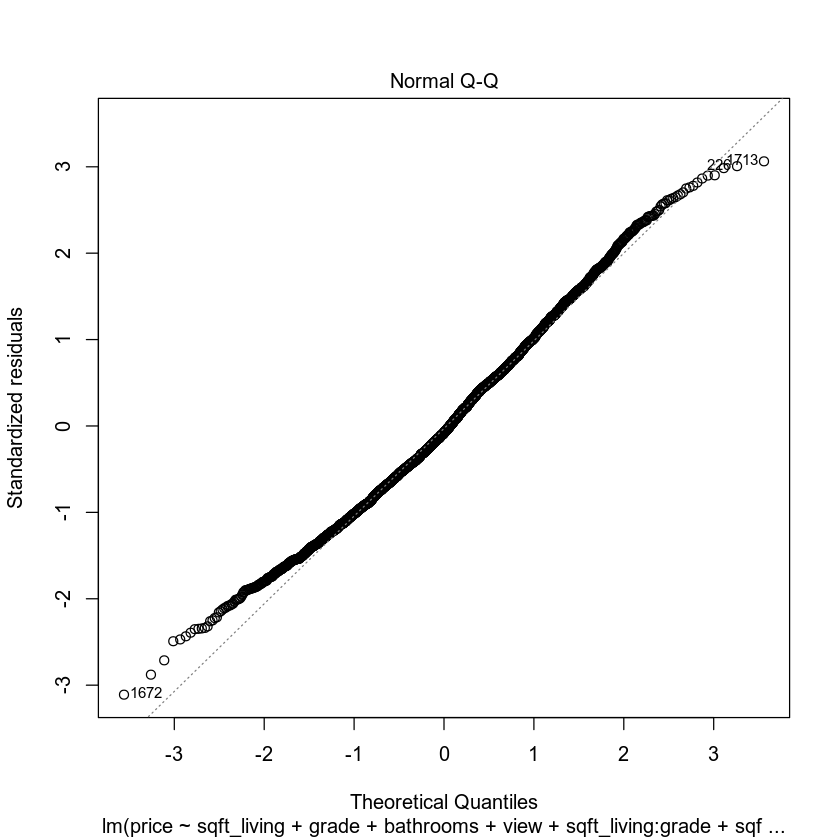

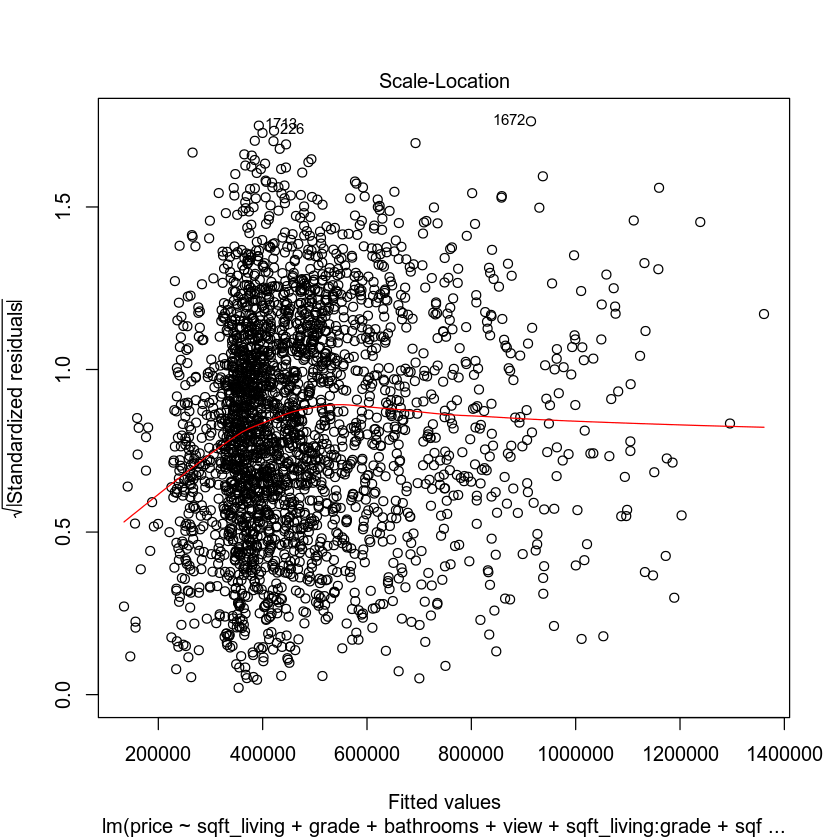

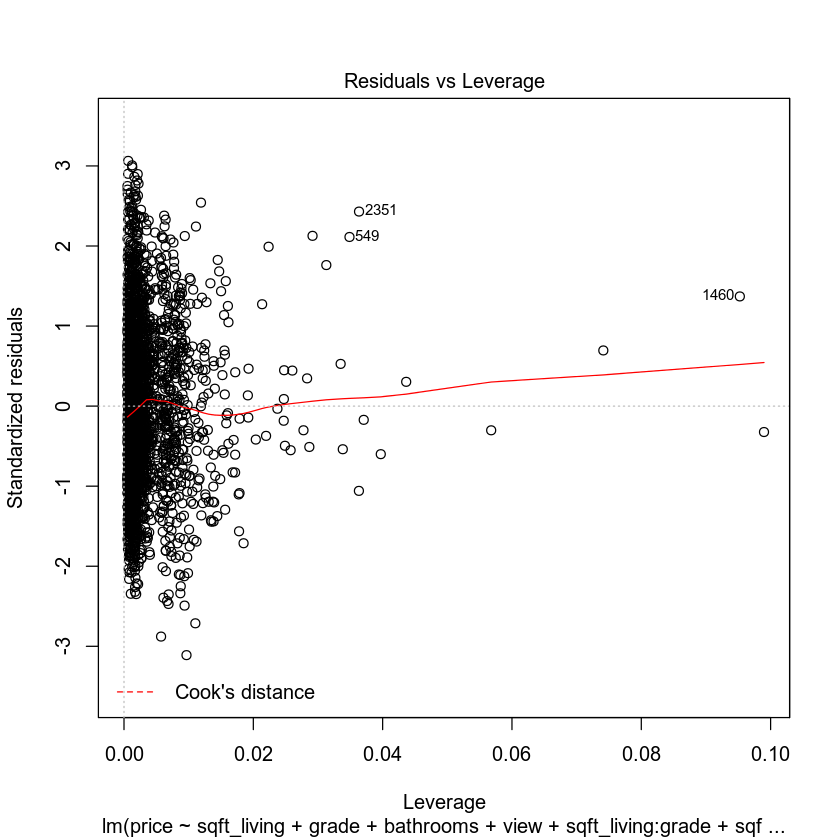

In [13]:
plot(fitted_first)

What is the predicted price for a home that backs out to a lake and has a 2,150 sq ft living area, 7 grade, and three bathrooms? Obtain 90% prediction and confidence intervals for the price of this home. Interpret each interval.

In [14]:
newdata1 <- data.frame(view="2", sqft_living=2150, grade=7, bathrooms=3)

print("prediction interval")
prediction_pred_int <- predict(fitted_first, newdata1, interval="predict", level=0.90) 
round(prediction_pred_int, 4)

print("confidence interval")
prediction_conf_int <- predict(fitted_first, newdata1, interval="confidence", level=0.90) 
round(prediction_conf_int, 4)

[1] "prediction interval"


fit,lwr,upr
624909.9,416718,833101.8


[1] "confidence interval"


fit,lwr,upr
624909.9,602885.7,646934.1


What is the predicted price for a home that backs out to a road and has a 2,150 sq ft living area, 7 grade, and three bathrooms? Obtain 90% prediction and confidence intervals for the price of this home. Interpret each interval. 

In [15]:
newdata2 <- data.frame(view="0", sqft_living=2150, grade=7, bathrooms=3)

print("prediction interval")
prediction_pred_int <- predict(fitted_first, newdata2, interval="predict", level=0.90) 
round(prediction_pred_int, 4)

print("confidence interval")
prediction_conf_int <- predict(fitted_first, newdata2, interval="confidence", level=0.90) 
round(prediction_conf_int, 4)

[1] "prediction interval"


fit,lwr,upr
398678,191343.1,606012.9


[1] "confidence interval"


fit,lwr,upr
398678,387322,410034


# Model #2 - Complete Second Order Regression Model with Quantitative Variables

You have been asked to create a complete second order regression model for *price* as the response variable, and *appliance_age* and *crime* as predictor variables. Before writing any code, review Section 4 of the Summary Report template to see the questions you will be answering about your complete second order multiple regression model.

Run your scripts to get the outputs of your regression analysis. Then use the outputs to answer the questions in your summary report.

**Note: Use the + (plus) button to add new code blocks, if needed.**

In [16]:
model_2_variables = c('price', 'appliance_age','crime')
data_2 <- housing[model_2_variables]
print(str(data_2))
summary(data_2)

'data.frame':	2692 obs. of  3 variables:
 $ price        : int  325000 745000 571000 395000 449950 243000 219950 799000 207000 750000 ...
 $ appliance_age: num  17.7 3.2 7.6 13 6.8 14.1 14.4 5.1 22.5 5.8 ...
 $ crime        : int  138 101 110 118 98 209 171 96 188 40 ...
NULL


     price         appliance_age       crime      
 Min.   :  78000   Min.   : 0.00   Min.   :  0.0  
 1st Qu.: 313075   1st Qu.: 7.30   1st Qu.: 96.0  
 Median : 432000   Median :10.70   Median :133.0  
 Mean   : 473155   Mean   :11.16   Mean   :137.8  
 3rd Qu.: 590000   3rd Qu.:14.50   3rd Qu.:174.0  
 Max.   :1525000   Max.   :37.40   Max.   :415.0  

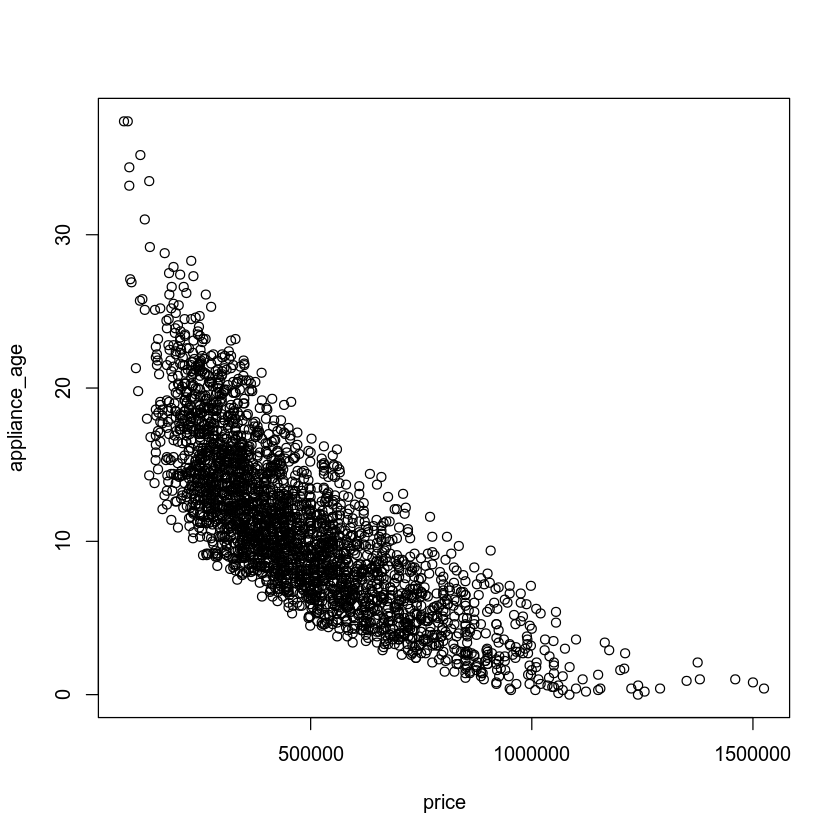

In [17]:
with(data_2, plot(price, appliance_age))

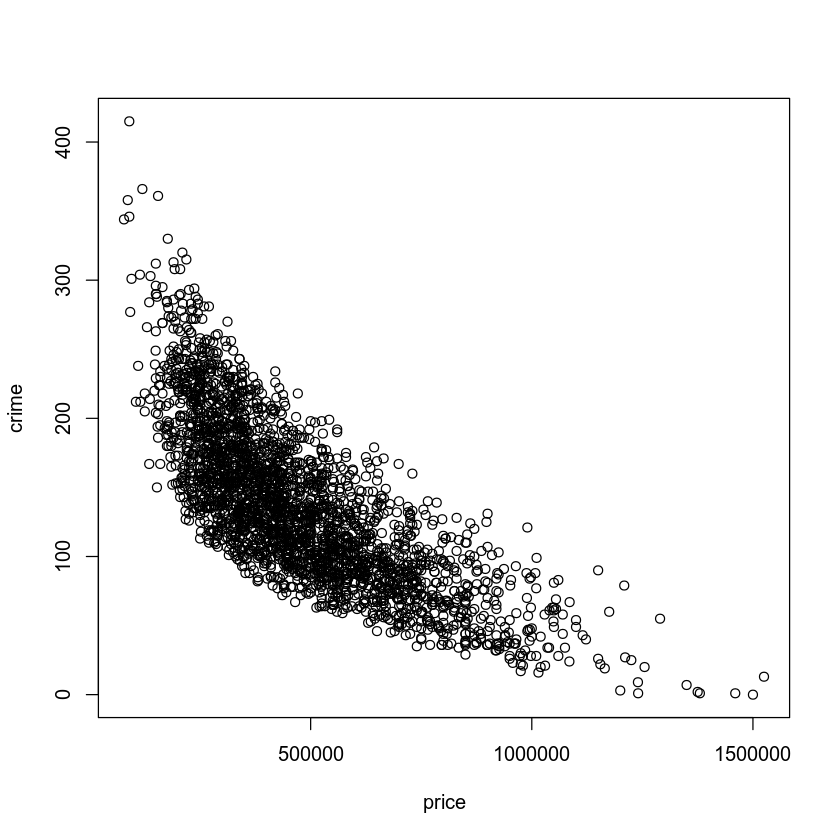

In [18]:
with(data_2, plot(price, crime))

In [19]:
cor(data_2)

,price,appliance_age,crime
price,1.0000000,-0.7859585,-0.7683115
appliance_age,-0.7859585,1.0000000,0.6673604
crime,-0.7683115,0.6673604,1.0000000


\begin{equation*}
\large E(Y) = {\beta}_0\ +\ {\beta}_1\ {x}_1\ +\  {\beta}_2\ {x}_2\ +\ {\beta}_3\ {x}_1{x}_2 + \ {\beta}_4\ {x}_1^2\ +\ {\beta}_5\ {x}_2^2\ 
\end{equation*}

In [20]:
fitted_second <- lm(price ~ appliance_age+crime+appliance_age:crime+I(appliance_age^2)+I(crime^2), data=data_2)
summary(fitted_second)


Call:
lm(formula = price ~ appliance_age + crime + appliance_age:crime + 
    I(appliance_age^2) + I(crime^2), data = data_2)

Residuals:
    Min      1Q  Median      3Q     Max 
-340502  -61196   -6241   57054  427449 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          1.161e+06  9.116e+03 127.376   <2e-16 ***
appliance_age       -4.256e+04  1.375e+03 -30.951   <2e-16 ***
crime               -3.678e+03  1.481e+02 -24.827   <2e-16 ***
I(appliance_age^2)   8.330e+02  7.933e+01  10.501   <2e-16 ***
I(crime^2)           6.380e+00  7.265e-01   8.782   <2e-16 ***
appliance_age:crime  1.390e+01  1.298e+01   1.072    0.284    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 92690 on 2686 degrees of freedom
Multiple R-squared:  0.8088,	Adjusted R-squared:  0.8084 
F-statistic:  2272 on 5 and 2686 DF,  p-value: < 2.2e-16


In [21]:
coeff=coefficients(fitted_second)
# equation of the line : 
cat(eq = paste0("y= ", round(coeff[1],1)," + ", round(coeff[2],1), 
                "(x_1)", " + ", round(coeff[3],1), "(x_2)", "+ ",  
                round(coeff[6],1), "(x_1x_2)", "+ ", round(coeff[4],1), "(x_1^2)", "+ ", round(coeff[5],1), "(x_2^2)"))
cat("\nwhere y: price, x_1: appliance age, x_2: crime")

y= 1161100.8 + -42562.2(x_1) + -3677.6(x_2)+ 13.9(x_1x_2)+ 833(x_1^2)+ 6.4(x_2^2)
where y: price, x_1: appliance age, x_2: crime

In [22]:
resid_values <-fitted_first$resid
fitted_values <- fitted_first$fitted
df<-data.frame(fitted_values,resid_values)
df

fitted_values,resid_values
<dbl>,<dbl>
586148.8,-261148.781
735037.0,9962.984
450975.9,120024.054
404217.3,-9217.275
363986.6,85963.360
362090.5,-119090.541
251848.1,-31898.140
748588.6,50411.399
378238.2,-171238.247


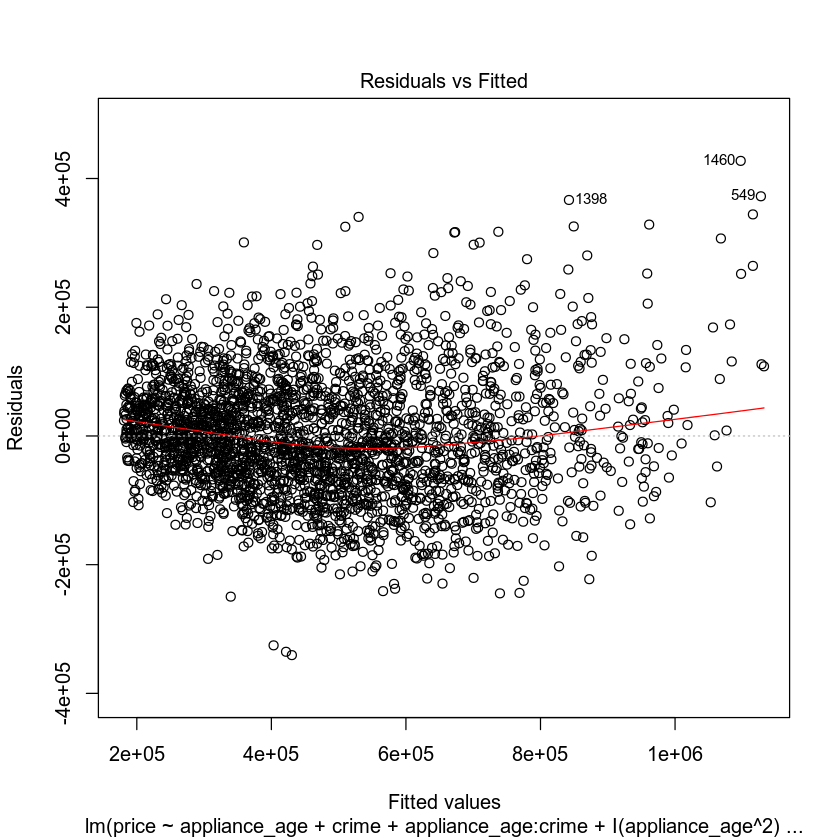

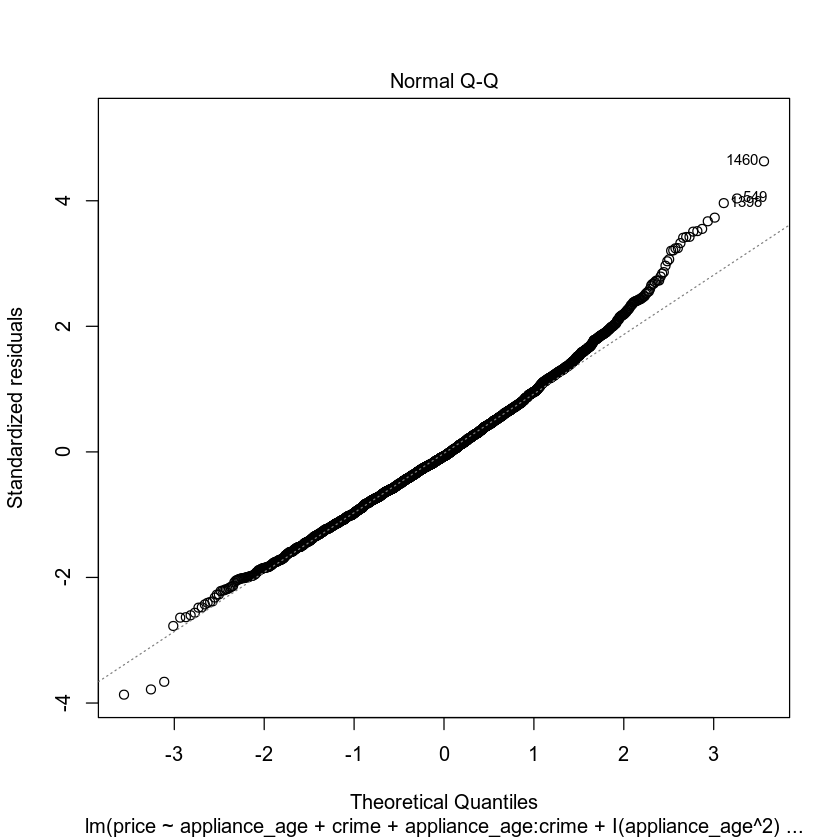

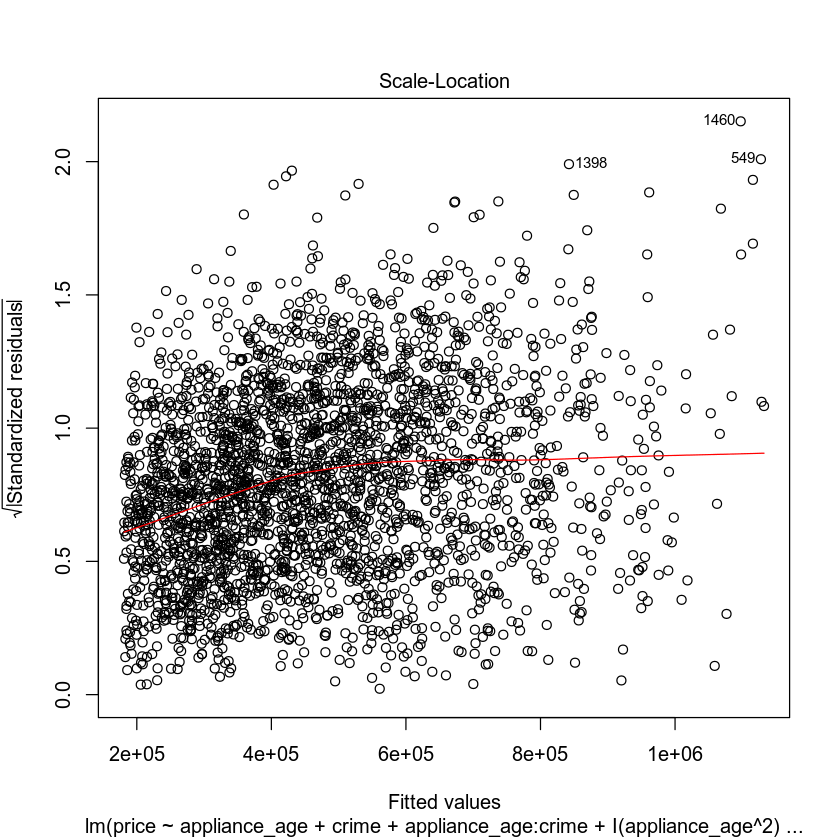

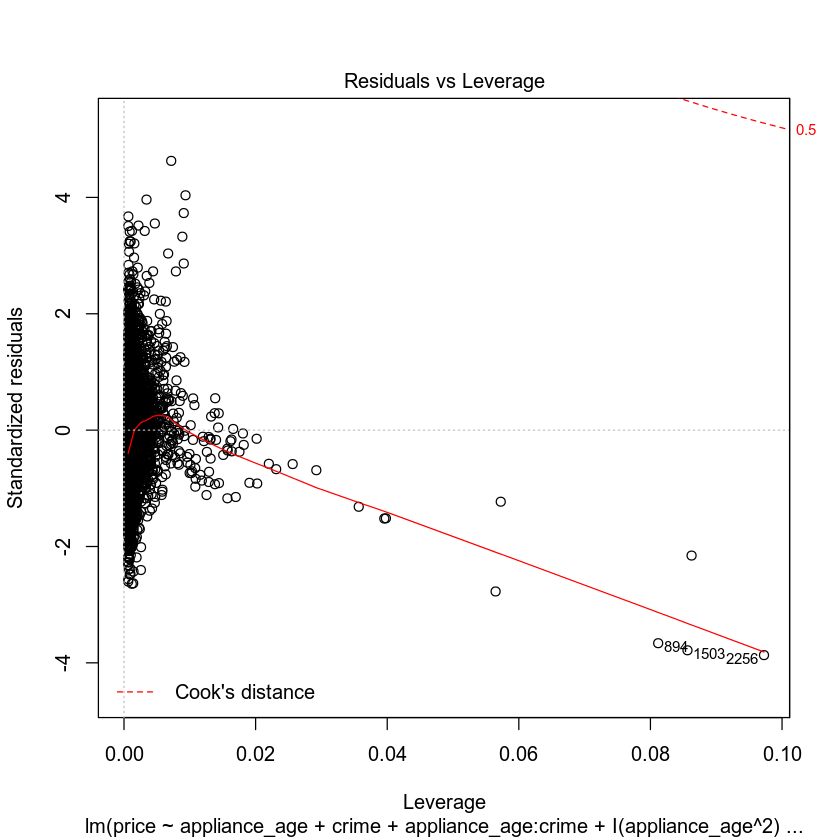

In [23]:
plot(fitted_second)

What is the predicted price for a home that has one-year-old appliances and is in an area that has a crime rate of 81.02 per 100,000 individuals? Obtain 90% prediction and confidence intervals for the price of this home. Interpret each interval.

In [24]:
newdata3 <- data.frame(appliance_age=1, crime=81.02)

print("prediction interval")
prediction_pred_int <- predict(fitted_second, newdata3, interval="predict", level=0.90) 
round(prediction_pred_int, 4)

print("confidence interval")
prediction_conf_int <- predict(fitted_second, newdata3, interval="confidence", level=0.90) 
round(prediction_conf_int, 4)

[1] "prediction interval"


fit,lwr,upr
864423.4,711566.6,1017280


[1] "confidence interval"


fit,lwr,upr
864423.4,854109.1,874737.7


What is the predicted price for a home that has 15-year-old appliances and is in an area that has a crime rate of 200.50 per 100,000 individuals? Obtain 90% prediction and confidence intervals for the price of this home. Interpret each interval. 

In [25]:
newdata4 <- data.frame(appliance_age=15, crime=200.50)

print("prediction interval")
prediction_pred_int <- predict(fitted_second, newdata4, interval="predict", level=0.90) 
round(prediction_pred_int, 4)

print("confidence interval")
prediction_conf_int <- predict(fitted_second, newdata4, interval="confidence", level=0.90) 
round(prediction_conf_int, 4)

[1] "prediction interval"


fit,lwr,upr
271051.6,118454.4,423648.8


[1] "confidence interval"


fit,lwr,upr
271051.6,265846,276257.2


# Nested Models F-Test

You have been asked to create a reduced model and compare it with the complete second order model (Model #2 above). Before writing any code, review Section 5 of the Summary Report template to see the questions you will need to answer.

Run your scripts to get the outputs of your regression analysis. Then use the outputs to answer the questions in your summary report.

**Note: Use the + (plus) button to add new code blocks, if needed.**

In [26]:
fitted_second_reduced <- lm(price ~ appliance_age+crime+appliance_age:crime, data=data_2)
summary(fitted_second_reduced)


Call:
lm(formula = price ~ appliance_age + crime + appliance_age:crime, 
    data = data_2)

Residuals:
    Min      1Q  Median      3Q     Max 
-336702  -63621   -4269   58742  439941 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          1.145e+06  8.792e+03  130.27   <2e-16 ***
appliance_age       -4.159e+04  8.377e+02  -49.65   <2e-16 ***
crime               -3.418e+03  7.097e+01  -48.17   <2e-16 ***
appliance_age:crime  1.510e+02  4.775e+00   31.63   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 94880 on 2688 degrees of freedom
Multiple R-squared:  0.7995,	Adjusted R-squared:  0.7993 
F-statistic:  3573 on 3 and 2688 DF,  p-value: < 2.2e-16


In [27]:
coeff=coefficients(fitted_second_reduced)
# equation of the line : 
cat(eq = paste0("y= ", round(coeff[1],1)," + ", round(coeff[2],1), 
                "(x_1)", " + ", round(coeff[3],1), "(x_2)", "+ ",  
                round(coeff[4],1), "(x_1x_2)"))
cat("\nwhere y: price, x_1: appliance age, x_2: crime")

y= 1145347.7 + -41591.9(x_1) + -3418.3(x_2)+ 151(x_1x_2)
where y: price, x_1: appliance age, x_2: crime

Run the nested model F-test at a 5% level of significance to evaluate if the quadratic (squared) terms are needed. Identify the null hypothesis, the alternative hypothesis, the P-value, and the conclusion of the test.

In [28]:
anova(fitted_second, fitted_second_reduced)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2686,2.307487e+13,NA,NA,NA,NA
2688,2.419614e+13,-2,-1.121271e+12,65.26001,2.113594e-28


## End of Project One Jupyter Notebook
The HTML output can be downloaded by clicking **File**, then **Download as**, then **HTML**. Be sure to answer all of the questions in the Summary Report template for Project One, and to include your completed Jupyter Notebook scripts as part of your submission.